In [1]:
# Market Basket Analysis(MBA) is used to identify items that are frequently purchased together.
# MBA is used by retail stores, restaurants, online shopping platforms that encourage 
# customer to buy bundle or set of purchases in one instance.

# Market Basket Analysis - Algorithm used is Apriori Algorithm 

# Apriori Algorithm does association rule mining that is a rule based process used to 
# identify correlations between items purchased by users.
# Apriori algorithm creates frequent sets that are combinations of items purchased together

# Apriori Algorithm has 3 main components: Support, Lift and Confidence
# Support assesses the overall popularity of a given product 
#           Transactions comprising the item
# Support = ---------------------------------
#               Total Transactions
# A high support value indicates that item is present in most purchases therefore focus
# has to made on its supply

# Confidence is the likelihood of different purchase combinations.
#                              Transactions comprising Bread and Milk
# Confidence(Bread --> Milk) = ----------------------------------------
#                               Transactions comprising of Bread
# It tells what percantage of consumers who bought bread also purchased milk along with it

# Lift refers to increase in the ratio of the sale of milk when bread is sold
#         Confidence(Bread --> Milk)
# Lift = ---------------------------
#          Support(Bread)
# How many times customers are likely to purchase milk when they buy bread

In [6]:
# !pip install apyori

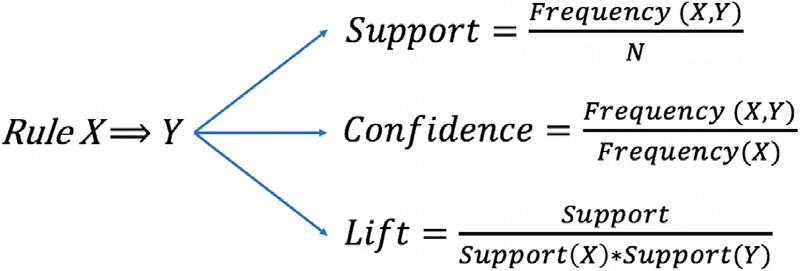
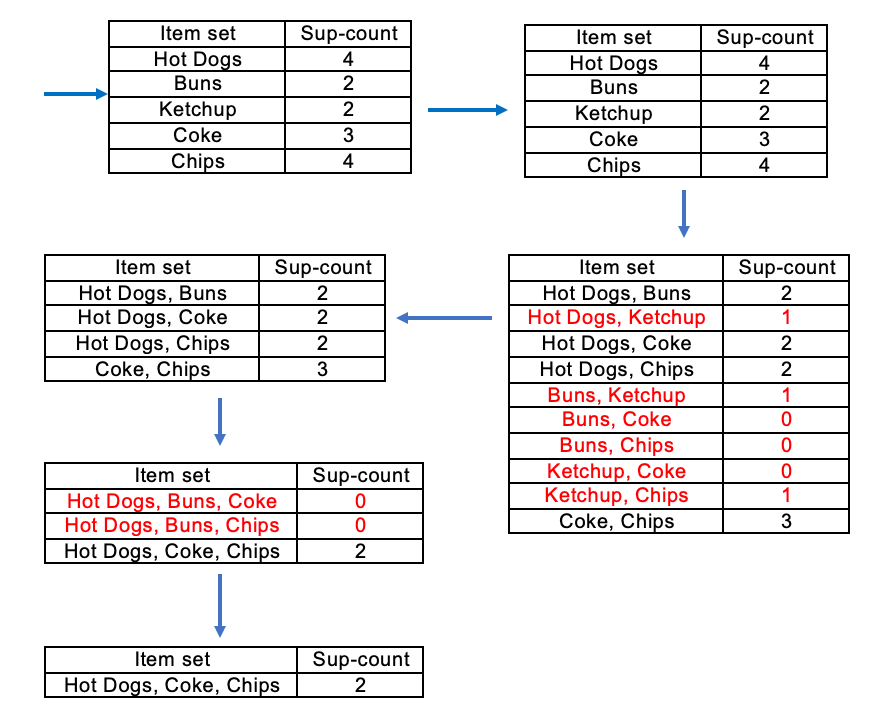

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets'

/Users/rajeshprabhakarkaila/Desktop/Datasets


In [5]:
transactions =pd.read_csv("transactions.csv")

In [8]:
# Covert Dataframe into List of Lists
l=[]
for i in range(1,7500):
    l.append([str(transactions.values[i,j])for j in range(0,20)])

In [10]:
from apyori import apriori

In [11]:
association_rules=apriori(l,min_support=0.003,min_confidence=0.20,min_lift=3,min_length=2)

In [12]:
association_rules=list(association_rules)

In [18]:
association_rules[0:5]

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533937858381117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.842659069325735)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005734097879717296, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7898219427631195)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005867448993199093, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.6995584674547795)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033337778370449394, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confid

In [19]:
len(association_rules)

158

In [21]:
from mlxtend.preprocessing import TransactionEncoder

In [52]:
encoder=TransactionEncoder().fit(l)

In [53]:
onehot=encoder.transform(l)

In [67]:
transact_onehot=pd.DataFrame(onehot,columns=encoder.columns_).drop('nan',axis=1)

In [68]:
from mlxtend.frequent_patterns import apriori

In [82]:
freq_itemsets=apriori(transact_onehot,min_support=0.005,max_len=3,use_colnames=True)

In [77]:
freq_itemsets.sort_values(by="support",ascending=False).head(20)

,support,itemsets
60,0.238298,(mineral water)
27,0.179624,(eggs)
83,0.174157,(spaghetti)
33,0.170956,(french fries)
20,0.163889,(chocolate)
44,0.132018,(green tea)
59,0.129617,(milk)
45,0.098280,(ground beef)
39,0.095346,(frozen vegetables)
68,0.095079,(pancakes)


In [85]:
from mlxtend.frequent_patterns import association_rules

In [86]:
assoc_rules=association_rules(freq_itemsets,metric="lift",min_threshold=1)

In [87]:
assoc_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         1826 non-null   object 
 1   consequents         1826 non-null   object 
 2   antecedent support  1826 non-null   float64
 3   consequent support  1826 non-null   float64
 4   support             1826 non-null   float64
 5   confidence          1826 non-null   float64
 6   lift                1826 non-null   float64
 7   leverage            1826 non-null   float64
 8   conviction          1826 non-null   float64
 9   zhangs_metric       1826 non-null   float64
dtypes: float64(8), object(2)
memory usage: 142.8+ KB


In [89]:
assoc_rules.head()
# Association Rule - antecedents and consequents
# {health} ---> {Cooking}
# Multiple antecedents rule
# {humor, travel} ---> {language}
# Multiple consequents rule
# {biography} ------> {history,language}
# Multiple antecedents and consequents rule
# {bigraphy,nonfiction} ----> {history,language}

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(almonds),(burgers),0.020269,0.087078,0.005201,0.256579,2.946532,0.003436,1.228001,0.674285
1,(burgers),(almonds),0.087078,0.020269,0.005201,0.059724,2.946532,0.003436,1.041961,0.723630
2,(almonds),(chocolate),0.020269,0.163889,0.006001,0.296053,1.806427,0.002679,1.187747,0.455657
3,(chocolate),(almonds),0.163889,0.020269,0.006001,0.036615,1.806427,0.002679,1.016967,0.533925
4,(almonds),(eggs),0.020269,0.179624,0.006534,0.322368,1.794685,0.002893,1.210652,0.451960


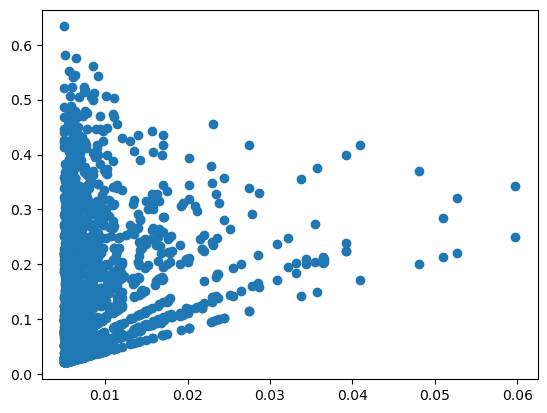

In [93]:
plt.scatter(x="support",y="confidence",data=assoc_rules)
plt.show()